In [1]:
from google_images_download import google_images_download

In [392]:
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
from sklearn.utils import shuffle
import math
from sklearn.model_selection import train_test_split
import cv2

In [29]:
image_dir=os.listdir('datasets/catvsdog')

In [30]:
image_dir

['cats', 'dogs']

In [32]:
all_cat_names=os.listdir('datasets/catvsdog/cats')
all_dog_names=os.listdir('datasets/catvsdog/dogs/')


# converting each image into 75*75

In [200]:
IMG_SIZE=75

In [201]:
cat_image_array=[]
for i in range(len(all_cat_names)):
    temp=plt.imread('datasets/catvsdog/cats/'+all_cat_names[i])
    temp=(cv2.resize(temp,(IMG_SIZE,IMG_SIZE)).T[0]).T
    temp=np.ndarray.flatten(temp).reshape(IMG_SIZE*IMG_SIZE)
    cat_image_array.append(temp)
    

    
dog_image_array=[]
for i in range(len(all_dog_names)):
    temp=plt.imread('datasets/catvsdog/dogs/'+all_dog_names[i])
    temp=(cv2.resize(temp,(IMG_SIZE,IMG_SIZE)).T[0]).T
    temp=np.ndarray.flatten(temp).reshape(IMG_SIZE*IMG_SIZE)
    dog_image_array.append(temp)

In [202]:
dog_image_array=np.array(dog_image_array)
cat_image_array=np.array(cat_image_array)

In [203]:
dog_image_array.shape

(798, 5625)

In [310]:
cat_image_df=pd.DataFrame(cat_image_array)
dog_image_df=pd.DataFrame(dog_image_array)


cat_image_df=(cat_image_df-cat_image_df.mean(axis=0))/cat_image_df.std(axis=0)
dog_image_df=(dog_image_df-dog_image_df.mean(axis=0))/dog_image_df.std(axis=0)

# Adding label column, 0 for cat, 1 for dog

In [313]:
cat_image_df['label']=0
dog_image_df['label']=1

# creating final dataset 

In [314]:
data=pd.concat([cat_image_df,dog_image_df])

In [315]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,5616,5617,5618,5619,5620,5621,5622,5623,5624,label
0,0.077665,0.279652,-0.175798,-0.153335,-0.129931,0.032905,0.023447,-0.240227,-0.283893,-0.342708,...,-1.376611,-1.178075,-1.142901,-1.169901,-1.172098,-1.187596,-1.068367,-0.969141,-0.942901,0
1,0.119943,0.081348,0.091800,0.157259,0.204871,0.312949,0.107737,0.283452,0.013111,-0.286330,...,-0.176342,-0.264250,-0.255304,-0.269501,-0.311599,-0.367471,-0.379258,-0.468961,-0.408462,0
2,-0.796084,-0.711872,-0.654658,-0.732169,-0.492633,-0.457171,-0.398005,-0.381762,-0.566754,-0.131290,...,0.367966,0.368398,0.378694,0.222905,0.379621,0.091242,0.103118,0.378567,0.454863,0
3,-0.077355,-0.074463,0.232641,0.326674,0.218821,0.298946,0.430850,0.170224,0.352544,0.235167,...,0.172574,0.185633,0.350516,0.419868,0.450154,0.549956,0.489019,0.503612,0.633009,0
4,1.895626,1.469482,1.415707,1.385517,1.306927,1.293101,1.259704,1.359116,0.663690,1.884223,...,1.679888,1.633694,1.717135,1.728262,1.635103,1.675889,1.729416,1.781852,1.729294,0


# shuffling the data to make it random

In [316]:
stds=data.std(axis=0)

In [317]:
for each in stds:
    if each<=0.2:
        print(each)

In [318]:
data=shuffle(data)

# separating the pixels and label

In [319]:
X=data.drop(['label'],axis=1).copy()    # features
Y=data['label']              # label


# splitting the data set into training and testing part

In [320]:
x_train,x_test,y_Train,y_test=train_test_split(X,Y)

x_train=np.array(x_train)
x_test=np.array(x_test)
y_Train=np.array(y_Train).reshape(len(y_Train),1)
y_test=np.array(y_test).reshape(len(y_test),1)


In [501]:
def linear_reg(m,x):
    z=-np.dot(x.astype(float),m)    
    z=np.array(z).reshape(len(z),1)
    return z

def sigmoid(m,x):
    z=linear_reg(m,x).astype(float)
    y= 1.0/(1.0+np.exp(-z))
    y[y==0]=0.000000000001
    y[y==1]=.9999999999999
    return y
    
def error_cost(m,x,y):
    y_predicted=sigmoid(m,x)
    
    
    c=np.mean(y)
    c=0
    e= - y*np.log(c+y_predicted)-(1-y)*np.log(c+1-y_predicted) 
    
 #   e=e[e!=-np.log(0)]          # to remove the -inf values
#    e = e[np.logical_not(np.isnan(e))] # to remove nan values
    
    
    #   e[np.isinf(np.log(e))]= 1
    #   e[ np.isnan(e)]=-1
    return np.mean(e)
        
def derivative_wrt_weights(m,x,y):
    return (np.mean( y-(sigmoid(m,x))*x ,axis=0).reshape(len(x.T),1))

       
def accuracy(m,x,y):
    y_predicted=sigmoid(m,x)
    y_predicted[y_predicted>=0.5]=1
    y_predicted[y_predicted<0.5]=0
    correct=len(y_predicted[y_predicted==y])
    return (correct*100)/len(y)

def train_model(weight0,lr,num_of_iteration):
    cost=[]
    weights=weight0
    for i in range(0,num_of_iteration):
             
        weights=weights-lr*derivative_wrt_weights(weights,x_train,y_Train)

        clear_output(True)
        cost.append(error_cost(weights,x_train,y_Train))
        print(i,'th Error :',error_cost(weights,x_train,y_Train))
        

    print("Training Accuracy is : {:.4f} %".format(accuracy(weights,x_train,y_Train)))
    print("Testing Accuracy is : {:.4f} %".format(accuracy(weights,x_test,y_test)))
    plt.plot(cost)
    plt.show()
    return weights

In [504]:
weight0 =np.random.randn(len(x_train.T),1)


9 th Error : 22.205138798617224
Training Accuracy is : 50.1484 %
Testing Accuracy is : 49.7778 %


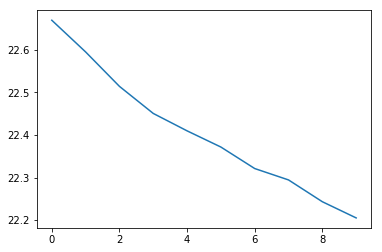

In [508]:
weights1=train_model(weight0,.00151,10)

119 th Error : 19.1227092569616
Training Accuracy is : 50.5935 %
Testing Accuracy is : 52.2222 %


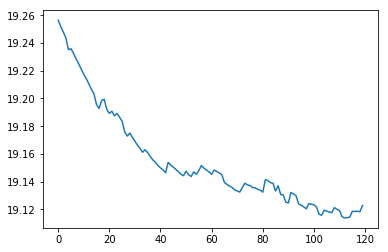

In [500]:
weights1=train_model(weight0,.0001,120)